In [2]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
#Parámetros
a=0.25
b=0.20
c=5.7

#INITIAL CONDITION
x0=1.0
y0=1.0
z0=1.0

#
trainLen=1000
testLen=1000
#

x0_y0_z0=np.array([x0,y0,z0])

#t
t=np.arange(trainLen+testLen+1)
print(t)

[   0    1    2 ..., 1998 1999 2000]


In [18]:
def dx_y_z(x_y_z,t,a,b,c):
    x,y,z=x_y_z
    dx_dt=-z-y
    dy_dt=x+a*y
    dz_dt=b+z*(x-c)
    return np.array([dx_dt,dy_dt,dz_dt])

In [19]:
x_y_z=scipy.integrate.odeint(dx_y_z,x0_y0_z0, t,args=(a,b,c))
x=x_y_z[:,0]

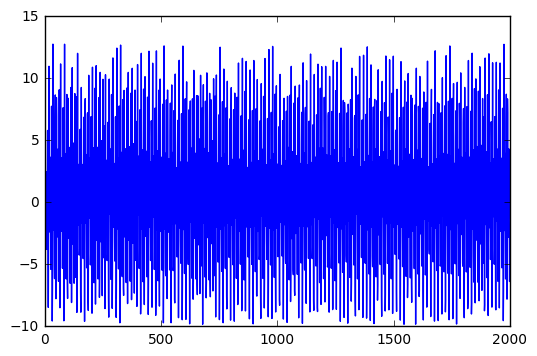

In [20]:
plt.plot(t,x)
plt.show()

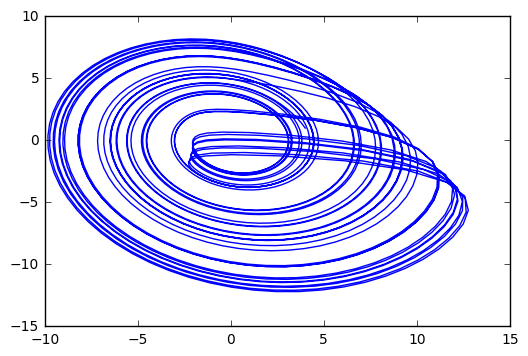

In [18]:
plt.plot(x_y_z[:,0], x_y_z[:,1])
plt.show()

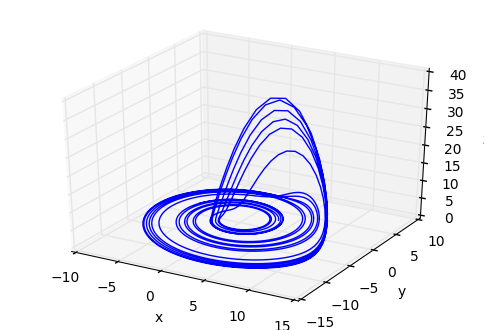

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x_y_z[:,0],x_y_z[:,1],x_y_z[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [27]:
def autocorr(x):
    result = scipy.signal.correlate(x, x, mode='full')
    result=result[result.size/2:]
    return result/result[0]

In [33]:
autocorr_x= scipy.signal.correlate(x_y_z[:,0], x_y_z[:,0], mode='full')

In [34]:
autocorr_x= autocorr(x_y_z[:,0])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until


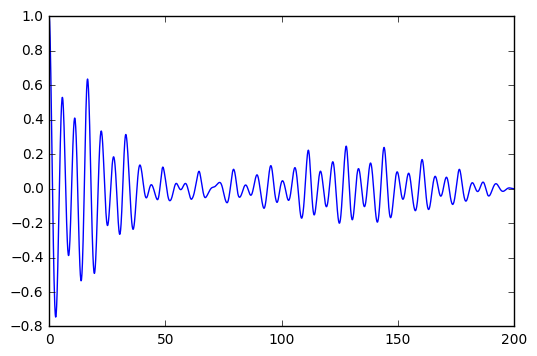

In [35]:
plt.plot(t,autocorr_x)
plt.show()